https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_VIG

In [3]:
X = data_VIG.values
size = int(len(X) * 0.6)

In [4]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [5]:
#print(data)

In [6]:
#ts = data

In [7]:
train, test = X[0:size], X[size:len(X)]


In [8]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=74.525312, expected=73.448715
predicted=73.810961, expected=73.769173
predicted=74.045212, expected=74.400932
predicted=74.612409, expected=73.329681
predicted=73.726086, expected=72.998428
predicted=73.372487, expected=73.421936
predicted=73.718928, expected=74.351784
predicted=74.551935, expected=72.759079
predicted=73.231202, expected=73.909874
predicted=74.118374, expected=73.339066
predicted=73.705979, expected=73.679726
predicted=73.955965, expected=70.107590
predicted=70.906784, expected=70.098366
predicted=70.587511, expected=68.063744
predicted=68.659995, expected=69.104065
predicted=69.368818, expected=68.846283
predicted=69.242205, expected=67.870399


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


predicted=68.344361, expected=69.212425
predicted=69.421170, expected=71.666763
predicted=71.741653, expected=71.601929
predicted=71.914350, expected=73.250504
predicted=73.348567, expected=72.898567
predicted=73.200694, expected=73.093056
predicted=73.338857, expected=70.712807
predicted=71.188168, expected=73.111603
predicted=73.116207, expected=73.528374
predicted=73.742401, expected=73.704330
predicted=73.941474, expected=71.342613
predicted=71.821699, expected=70.944366
predicted=71.271677, expected=72.602180
predicted=72.674372, expected=72.458672
predicted=72.671756, expected=68.833893
predicted=69.511133, expected=67.669106
predicted=68.218213, expected=68.600929
predicted=68.958759, expected=70.800026
predicted=70.941056, expected=69.420937
predicted=69.777018, expected=69.262512
predicted=69.565150, expected=71.060951
predicted=71.130212, expected=72.141853
predicted=72.156786, expected=73.492989
predicted=73.422761, expected=74.322327
predicted=74.248503, expected=75.552322


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=88.764148, expected=88.573807
predicted=88.754979, expected=89.497543
predicted=89.599894, expected=89.545654
predicted=89.685804, expected=91.017876
predicted=91.017843, expected=90.546394
predicted=90.665051, expected=91.625893
predicted=91.622821, expected=92.486168
predicted=92.450791, expected=92.824493
predicted=92.806962, expected=93.965096
predicted=93.864752, expected=94.303413
predicted=94.238261, expected=93.965096
predicted=93.973310, expected=93.858772
predicted=93.888774, expected=94.197083
predicted=94.209301, expected=94.970375
predicted=94.937220, expected=97.222610
predicted=97.023353, expected=97.802597
predicted=97.661214, expected=98.585541
predicted=98.436387, expected=98.498558
predicted=98.420296, expected=99.152733
predicted=99.053476, expected=101.086617
predicted=100.892139, expected=102.592911
predicted=102.405513, expected=103.768791
predicted=103.610879, expected=105.780411
predicted=105.618007, expected=101.902931
predicted=102.066134, expected=

In [9]:
error_VIG = math.sqrt(mean_squared_error(test, predictions))
%store error_VIG
print('Test RMSE: %.3f' % error_VIG)

Stored 'error_VIG' (float)
Test RMSE: 1.598


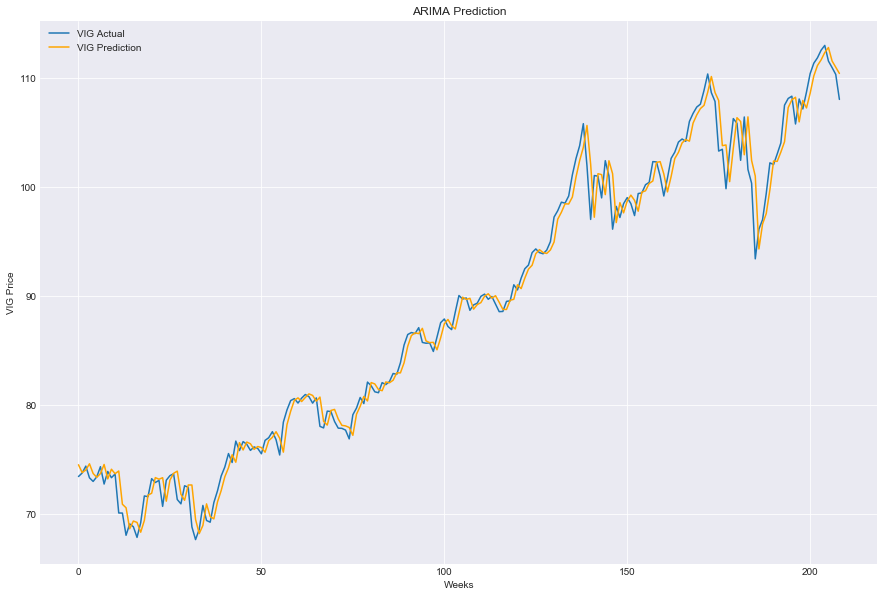

In [10]:
# plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'VIG Actual')
plt.plot(predictions, color='orange', label = 'VIG Prediction')
plt.xlabel('Weeks')
plt.ylabel('VIG Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [11]:
ARIMA_pred_VIG = pd.DataFrame(predictions) 
ARIMA_pred_VIG.columns = ['ARIMA_pred_VIG']
%store ARIMA_pred_VIG

Stored 'ARIMA_pred_VIG' (DataFrame)
